In [137]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import json
import re
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from bs4 import BeautifulSoup as bs
import urllib.request 
from urllib.request import urlopen
import seaborn as sb
import os
import time
import requests
from requests import get
import re
from random import randint
from warnings import warn
from time import time
from datetime import datetime
from time import sleep
from selenium import webdriver
import pandas as pd
%matplotlib inline
import matplotlib as plt
import sklearn.linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.stats.diagnostic as dg
from statsmodels.compat import lzip
from statsmodels.stats.stattools import durbin_watson
import math
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn import utils
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [138]:
from matplotlib import pyplot as plt

In [ ]:
url = 'https://sandiego.craigslist.org/csd/apa/d/san-diego-steps-to-mission-beach/7353789135.html'
html = requests.get(url)
soup = bs(html.text, 'html.parser')
soup
detailsRent = soup.find_all('p', {'class': 'attrgroup'})
detailsRent
bedBathSqft = soup.find_all('span', {'class': 'shared-line-bubble'})


In [ ]:
##test 1

url = 'https://inlandempire.craigslist.org/apa/d/riverside-fith-wheel-for-sale-32-ft/7352437691.html'
html = requests.get(url)
soup = bs(html.text, 'html.parser')

In [ ]:
## test 2
url = 'https://sandiego.craigslist.org/csd/apa/d/san-diego-cottage-apartment/7362820000.html'
html = requests.get(url)
soup = bs(html.text, 'html.parser')


In [ ]:
# test 3

url = 'https://post.craigslist.org/k/PnqhrBD76xGi4hlwdlBDLA/ZZFwS?s=preview'
html = requests.get(url)
soup = bs(html.text, 'html.parser')
soup

In [217]:
import requests
from requests import get
import re
from random import randint
from warnings import warn
from time import time
from datetime import datetime
from time import sleep
from selenium import webdriver
import pandas as pd

url = 'https://sandiego.craigslist.org/search/apa?'
html = requests.get(url)
soup = bs(html.text, 'html.parser')
linksList = []
hoodList = []
find_total = soup.find('div', class_= 'search-legend')
total_posts = int(find_total.find('span', class_='totalcount').text)
pages = np.arange(0, total_posts+1, 120) ## change to 120 to creat the whole scraping loop
iterations = 0

for page in pages:
    response = get(url 
                   + "s=" # parameter for defining page number in the link 
                   + str(page)) # page number in the pages array
    sleep(randint(10,20)) ## slowing the crawl rate
    if response.status_code != 200: ## setting a warning if we get a bad response
        warn('Request: {}; Status code: {}'.format(requests,response.status_code))
    soup = bs(response.text, 'html.parser') ## Using beautiful soup to parse the html from the get request and converting to text
    c_links = soup.find_all('h3', {'class': 'result-heading'})## finding all the links to the ads
    hood_pull = soup.find_all('span', {'class': 'result-meta'})
    for item in c_links: ## Loop to grab just the links from object they're in and appending to our empty list
        links = item.find('a', {'class':'result-title hdrlnk'})['href']
        linksList.append(links)
        iterations += 1
        print("link " + str(iterations) + " scraped successfully!")
    for item in hood_pull: ## Loop to grab just the links from object they're in and appending to our empty list
        hood = item.find('span', {'class': 'result-hood'}).text
        hood = hood.replace('(','')
        hood = hood.replace(')','')
        hoodList.append(hood)
        iterations += 1
        print("hood " + str(iterations) + " scraped successfully!")

    
print("\n")
print("Scrape complete!")  


def notFound(listComp, masterList):
    if listComp ==[]:
        listComp = "Not Found" ## works....kind of
        masterList.append(listComp)
    else:
        masterList.append(listComp)
sq_ft = []
title = []
washer_dryer = []
parking = []
flooring = []
rental_period = []
ev_charging = []
ac = []
cats_ok = []
dogs_ok = []
furnished = []
washer_dryer = [] ## extra results needed
smoking = []
parking = [] ## extra results needed
wheelchair = []
housing_type = [] ## extra results needed
bed = []
bath = []
price = []
availability_date = []
posting_date = []


for i in range(0,3000):## 0 and three are selecting to scrape 3 ads through our linked list. So need to just change to max number ads to up the data counts
    url = linksList[i]
    driver2 = webdriver.Chrome()
    driver2.get(url)  
    sleep(randint(10,20))
    soup = bs(driver2.page_source, 'html.parser')
    for z in soup.find_all('p', {'class': 'attrgroup'}):
        z = z.get_text()
        z = z.replace('\n',',')
        res = z.split(',')
    housing = [i for i in res if i =='apartment' or i =='condo' or i == 'cottage/cabin' or i=='duplex' or i =='flat' or
           i == 'house' or i== 'in-law' or i=='loft' or i=='townhouse' or i == 'manufactured' or i=='assisted living' or
           i== 'land']
    notFound(housing,housing_type)
    wd = [i for i in res if i =='w/d in unit' or i =='w/d hookups' or i == 'laundry in bldg' or 
          i=='laundry on site' or i =='no laundry on site']
    notFound(wd,washer_dryer)
    park = [i for i in res if i =='carport' or i =='attached garage' or i == 'detached garage' or 
            i=='off-street parking' or i =='street parking' or i == 'valet parking' or i == 'no parking']
    notFound(park,parking)
    period = [i for i in res if i =='rent period: daily' or i =='rent period: weekly' or i == 'rent period: monthly' or 
              i=='rent period: yearly']
    notFound(period,rental_period)
    floor = [i for i in res if i =='flooring: wood' or i =='flooring: carpet' or i == 'flooring: concrete' or 
             i=='flooring: tile' or i =='flooring: earthen' or i == 'flooring: other']
    notFound(floor,flooring)
    ev = [i for i in res if i =='EV charging']
    notFound(ev,ev_charging)
    acu = [i for i in res if i =='air conditioning']
    notFound(acu,ac)
    cats = [i for i in res if i =='cats are OK - purrr']
    notFound(cats,cats_ok)
    dogs = [i for i in res if i =='dogs are OK - wooof']
    notFound(dogs,dogs_ok)
    furn = [i for i in res if i =='furnished']
    notFound(furn,furnished)
    smoke = [i for i in res if i =='no smoking']
    notFound(smoke,smoking)
    wheel = [i for i in res if i =='wheelchair accessible']
    notFound(wheel,wheelchair)
    if soup.find('span', {'class':'price'}) is not None:
        x =soup.find('span', {'class':'price'}).string
        price.append(x)
    else:
        x = np.nan
        price.append(x)
    if soup.findAll('span', {'class':'housing'})== [] or soup.findAll('span', {'class':'shared-line-bubble'})==[]:
        sq = np.nan
        sq_ft.append(sq)
    elif soup.findAll('span', {'class':'shared-line-bubble'}) is not None and len(soup.findAll('span', {'class':'shared-line-bubble'}))==3 or len(soup.findAll('span', {'class':'shared-line-bubble'}))==2:
        sq = soup.findAll('span', {'class':'shared-line-bubble'})[1].text
        sq = re.sub("\D", "", sq)
        sq = sq[:len(sq)-1]
        sq_ft.append(sq)
    elif soup.findAll('span', {'class':'housing'}) is not None and len(soup.find('span', {'class':'housing'}))==3:
        sq = soup.find('span', {'class':'housing'}).text.split()[3][:-3]
        sq_ft.append(sq)
    else:
        sq = np.nan
        sq_ft.append(sq)
    if  soup.find('span', {'id' : 'titletextonly'}) is not None:
        tit = soup.find('span', {'id' : 'titletextonly'}).text
        title.append(tit)
    else: 
        tit = None
        title.append(tit)
    if soup.find('time', {'class' : 'date timeago'}) is not None:
        post = soup.find('time', {'class' : 'date timeago'})['datetime']
        posting_date.append(post)
    else:
        post = None
        posting_date.append(post)
    a = soup.find('span', {'class' : 'housing_movein_now property_date shared-line-bubble'})
    b= soup.find('span',{'class' :'housing_movein_now property_date shared-line-bubble attr_is_today'})
    if a is None and b is None:
        av = "Not Found"
        availability_date.append(av)
    elif a is not None:
        av = [soup.find('span', {'class' : 'housing_movein_now property_date shared-line-bubble'})['data-date']]
        availability_date.append(av)  ## available
    elif b is not None:
        av = [soup.find('span', {'class' : 'housing_movein_now property_date shared-line-bubble attr_is_today'})['data-date']]
        availability_date.append(av)  ## available
    if soup.findAll('span', {'class':'housing'})==[] or soup.findAll('span', {'class': 'shared-line-bubble'})==[]:
        bb = np.nan
        bed.append(bb)
        bath.append(bb)
    elif soup.findAll('span', {'class': 'shared-line-bubble'}) is not None and len(soup.findAll('span', {'class':'shared-line-bubble'}))==3:
        bb = soup.find('span', {'class': 'shared-line-bubble'}).text ##bed & bath
        bb = re.sub("\D", "", bb)
        if len(bb) ==2:
            bed.append(bb[0])
            bath.append(bb[1])
        elif len(bb)==1:
            bed.append(bb[0])
            bath.append(np.nan)
        elif len(bb)==3:
            bed.append(bb[0])
            ba = float(bb[1:3])
            bat = ba/10
            bath.append(bat)
        else:
            bb = np.nan
            bed.append(bb)
            bath.append(bb)
    elif soup.findAll('span', {'class': 'shared-line-bubble'}) is not None and len(soup.findAll('span', {'class':'shared-line-bubble'}))==1:
        bb = soup.find('span', {'class': 'shared-line-bubble'}).text ##bed & bath
        bb = re.sub("\D", "", bb)
        if len(bb) ==2:
            bed.append(bb[0])
            bath.append(bb[1])
        elif len(bb)==1:
            bed.append(bb[0])
            bath.append(np.nan)
        elif len(bb)==3:
            bed.append(bb[0])
            ba = float(bb[1:3])
            bat = ba/10
            bath.append(bat)
        else:
            bb = np.nan
            bed.append(bb)
            bath.append(bb)
    elif soup.findAll('span', {'class': 'shared-line-bubble'}) is not None and len(soup.findAll('span', {'class':'shared-line-bubble'}))==2:
        bb = soup.find('span', {'class': 'shared-line-bubble'}).text ##bed & bath
        bb = re.sub("\D", "", bb)
        if len(bb) ==2:
            bed.append(bb[0])
            bath.append(bb[1])
        elif len(bb)==1:
            bed.append(bb[0])
            bath.append(np.nan)
        elif len(bb)==3:
            bed.append(bb[0])
            ba = float(bb[1:3])
            bat = ba/10
            bath.append(bat)
        else:
            bb = np.nan
            bed.append(bb)
            bath.append(bb)
    elif soup.findAll('span', {'class':'housing'}) is not None and len(soup.find('span', {'class':'housing'}))==3:
        bb = soup.find('span', {'class':'housing'}).text.split()[1][:-2]
        bed.append(bb)
    else:
        bb = np.nan
        bed.append(bb)
        bath.append(bb)
    driver2.close()
    print("Ad " + str(i) + " scraped successfully!")


sdRents = pd.DataFrame({'title' : title,
                        'links' : linksList,
                        'sq_ft': sq_ft,
                        'posting_date' : posting_date,
                        'bed': bed,
                        'bath': bath,
                        'ev_charging': ev_charging,
                         'ac': ac,
                         'cats_ok': cats_ok,
                         'dogs_ok': dogs_ok,
                         'flooring_type': flooring,
                         'furnished': furnished,
                         'washer_dryer': washer_dryer,
                         'smoking' : smoking,
                        'parking' : parking,
                       'wheelchair' : wheelchair,
                       'price' : price,
                        'housing type' : housing_type,
                        'rent period' : rental_period,
                       'availability_date' : availability_date, 
                        'hood' : hoodList})

## Data Cleaning

sdRents['Price_Hundreds'] = sdRents['price'].str.extract('(....)', expand=True)
sdRents['Price_Thousands'] = sdRents['price'].str.extract('(......)', expand=True)
mask = sdRents['Price_Thousands'].isnull()
sdRents['Price_Thousands'][mask] = sdRents['Price_Hundreds']
sdRents['Price'] = sdRents['Price_Thousands'].replace({'\$':''}, regex = True)
sdRents['Price'] = sdRents['Price'].replace({'\,':''}, regex = True)
sdRents.drop(columns=['Price_Thousands', 'Price_Hundreds'],axis=1, inplace=True)

sdRents['Sq_FT_Hundreds'] = sdRents['sq_ft'].str.extract('(\d\d\d)', expand=True)
sdRents['Sq_FT_Thousands'] = sdRents['sq_ft'].str.extract('(\d\d\d\d)', expand=True)
sdRents['Sq_Ft'] = sdRents['Sq_FT_Thousands'].fillna(sdRents['Sq_FT_Hundreds'])
sdRents.drop(columns=['Sq_FT_Hundreds', 'Sq_FT_Thousands'],axis=1, inplace=True)
## Getting correct dtype
## NEED TO DROP NULL VALUES OR FILL THEM
sdRents = sdRents.dropna(axis='rows')

sdRents['Bedrooms'] = sdRents['bed'].astype('int64')
sdRents['Bathrooms'] = sdRents['bath'].astype('int64')
sdRents['Price'] = sdRents['Price'].astype('int64')
sdRents['Sq_Ft'] = sdRents['Sq_Ft'].astype('int64')

sdRents.drop(columns=['bed', 'bath', 'price','sq_ft'], axis =1, inplace = True)

## How to get all the values updated to new categorical values nad account for the brackets

def cleaningFunction(dataFrame, columnName, categoryRating, stringToSearch, elseString, columnName2):
                          dataFrame[columnName] = [categoryRating if x ==[stringToSearch] else elseString for x in dataFrame[columnName2]]

cleaningFunction(sdRents, 'EV Charging', 1, 'EV charging', 0, 'ev_charging')
cleaningFunction(sdRents, 'AC', 1, 'air conditioning', 0, 'ac')
cleaningFunction(sdRents, 'Cats OK', 1, 'cats are OK - purrr', 0, 'cats_ok')
cleaningFunction(sdRents, 'Dogs OK', 1, 'dogs are OK - wooof', 0, 'dogs_ok')
cleaningFunction(sdRents, 'Furnished', 1, 'furnished', 0, 'furnished')
cleaningFunction(sdRents, 'Smoking', 1, 'no smoking', 0, 'smoking')
cleaningFunction(sdRents, 'Wheelchair', 1, 'wheelchair accessible', 0, 'wheelchair')

sdRents.drop(columns=['ev_charging', 'ac', 'cats_ok','dogs_ok', 'furnished', 'smoking', 'wheelchair'], axis =1, inplace = True)

## Housing category
sdRents['apartment'] = [1 if x ==['apartment'] else 0 for x in sdRents['housing type']]

sdRents['condo'] = [1 if x==['condo'] else 0 for x in sdRents['housing type']]

sdRents['cottage/cabin'] = [1 if x==['cottage/cabin'] else 0 for x in sdRents['housing type']]

sdRents['duplex'] = [1 if x==['duplex'] else 0 for x in sdRents['housing type']]

sdRents['flat'] = [1 if x==['flat'] else 0 for x in sdRents['housing type']]

sdRents['house'] = [1 if x==['house'] else 0 for x in sdRents['housing type']]

sdRents['in-law'] = [1 if x==['in-law'] else 0 for x in sdRents['housing type']]

sdRents['loft'] = [1 if x==['loft'] else 0 for x in sdRents['housing type']]

sdRents['townhouse'] = [1 if x==['townhouse'] else 0 for x in sdRents['housing type']]

sdRents['manufactured'] = [1 if x==['manufactured'] else 0 for x in sdRents['housing type']]

sdRents['assisted living'] = [1 if x==['assisted living'] else 0 for x in sdRents['housing type']]

sdRents['land'] = [1 if x==['land'] else 0 for x in sdRents['housing type']]

# ## washer dryer category
sdRents['w/d in unit'] = [1 if x ==['w/d in unit'] else 0 for x in sdRents['washer_dryer']]

sdRents['w/d hookups'] = [1 if x ==['w/d hookups'] else 0 for x in sdRents['washer_dryer']]

sdRents['laundry in bldg'] = [1 if x ==['laundry in bldg'] else 0 for x in sdRents['washer_dryer']]

sdRents['laundry on site'] = [1 if x ==['laundry on site'] else 0 for x in sdRents['washer_dryer']]

sdRents['no laundry on site'] = [1 if x ==['no laundry on site'] else 0 for x in sdRents['washer_dryer']]

## parking category

sdRents['carport'] = [1 if x ==['carport'] else 0 for x in sdRents['parking']]

sdRents['attached garage'] = [1 if x ==['attached garage'] else 0 for x in sdRents['parking']]

sdRents['detached garage'] = [1 if x ==['detached garage'] else 0 for x in sdRents['parking']]

sdRents['off-street parking'] = [1 if x ==['off-street parking'] else 0 for x in sdRents['parking']]

sdRents['street parking'] = [1 if x ==['street parking'] else 0 for x in sdRents['parking']]

sdRents['valet parking'] = [1 if x ==['valet parking'] else 0 for x in sdRents['parking']]

sdRents['no parking'] = [1 if x ==['no parking'] else 0 for x in sdRents['parking']]

# ## Flooring type
sdRents['wood_floors'] = [1 if x ==['flooring: wood'] else 0 for x in sdRents['flooring_type']]

sdRents['carpet_floors'] = [1 if x ==['flooring: carpet'] else 0 for x in sdRents['flooring_type']]

sdRents['concrete_floors'] = [1 if x ==['flooring: concrete'] else 0 for x in sdRents['flooring_type']]

sdRents['tile_floors'] = [1 if x ==['flooring: tile'] else 0 for x in sdRents['flooring_type']]

sdRents['earthen_floors'] = [1 if x ==['flooring: earthen'] else 0 for x in sdRents['flooring_type']]

sdRents['other_floors'] = [1 if x ==['flooring: other'] else 0 for x in sdRents['flooring_type']]


# ## Rental Period
                       
sdRents['daily_rent'] = [1 if x ==['rent period: daily'] else 0 for x in sdRents['rent period']]

sdRents['weekly_rent'] = [1 if x ==['rent period: weekly'] else 0 for x in sdRents['rent period']]

sdRents['monthly_rent'] = [1 if x ==['rent period: monthly'] else 0 for x in sdRents['rent period']]

sdRents['yearly_rent'] = [1 if x ==['rent period: yearly'] else 0 for x in sdRents['rent period']]

sdRents.drop(columns=['rent period', 'flooring_type', 'parking','washer_dryer', 'housing type'], axis =1, inplace = True)

# sdRents.to_csv('sdRents.csv')
pd.set_option("display.max_rows", None) 
sdRents.describe()
sdRents.head(25)

sdRents.describe()

link 1 scraped successfully!
link 2 scraped successfully!
link 3 scraped successfully!
link 4 scraped successfully!
link 5 scraped successfully!
link 6 scraped successfully!
link 7 scraped successfully!
link 8 scraped successfully!
link 9 scraped successfully!
link 10 scraped successfully!
link 11 scraped successfully!
link 12 scraped successfully!
link 13 scraped successfully!
link 14 scraped successfully!
link 15 scraped successfully!
link 16 scraped successfully!
link 17 scraped successfully!
link 18 scraped successfully!
link 19 scraped successfully!
link 20 scraped successfully!
link 21 scraped successfully!
link 22 scraped successfully!
link 23 scraped successfully!
link 24 scraped successfully!
link 25 scraped successfully!
link 26 scraped successfully!
link 27 scraped successfully!
link 28 scraped successfully!
link 29 scraped successfully!
link 30 scraped successfully!
link 31 scraped successfully!
link 32 scraped successfully!
link 33 scraped successfully!
link 34 scraped suc

SessionNotCreatedException: Message: session not created: This version of ChromeDriver only supports Chrome version 102
Current browser version is 104.0.5112.81 with binary path C:\Program Files (x86)\Google\Chrome\Application\chrome.exe


In [ ]:
sdRents.to_csv('sdRents.csv')

In [139]:
sdRents = pd.read_csv('sdRents.csv')

In [4]:
pd.set_option("display.max_columns", None) 
sdRents.describe()

,Unnamed: 0,Price,Sq_Ft,Bedrooms,Bathrooms,EV Charging,AC,Cats OK,Dogs OK,Furnished,Smoking,Wheelchair,apartment,condo,cottage/cabin,duplex,flat,house,in-law,loft,townhouse,manufactured,assisted living,land,w/d in unit,w/d hookups,laundry in bldg,laundry on site,no laundry on site,carport,attached garage,detached garage,off-street parking,street parking,valet parking,no parking,wood_floors,carpet_floors,concrete_floors,tile_floors,earthen_floors,other_floors,daily_rent,weekly_rent,monthly_rent,yearly_rent
count,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000,2251.0,2251.000000,2251.000000,2251.0,2251.0,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000,2251.0,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000,2251.0,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000
mean,1440.537983,2566.838738,911.402044,1.624611,1.414038,0.107508,0.224789,0.637050,0.623723,0.051533,0.428254,0.173701,0.893381,0.024878,0.004442,0.019547,0.000444,0.042203,0.002665,0.0,0.011550,0.000888,0.0,0.0,0.519769,0.029765,0.107064,0.317637,0.025766,0.397601,0.143936,0.112394,0.263883,0.068858,0.0,0.013327,0.118614,0.050200,0.002221,0.023545,0.0,0.035540,0.000888,0.000444,0.115948,0.109729
std,873.676057,950.288260,412.863165,0.844800,0.561789,0.309827,0.417536,0.480957,0.484559,0.221131,0.494936,0.378936,0.308697,0.155787,0.066518,0.138468,0.021077,0.201098,0.051571,0.0,0.106874,0.029801,0.0,0.0,0.499720,0.169975,0.309263,0.465661,0.158473,0.489511,0.351103,0.315921,0.440834,0.253269,0.0,0.114698,0.323406,0.218406,0.047088,0.151661,0.0,0.185181,0.029801,0.021077,0.320234,0.312621
min,0.000000,500.000000,140.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,676.500000,1950.000000,700.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1411.000000,2414.000000,850.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2172.500000,2897.500000,1030.500000,2.000000,2.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
max,2998.000000,9500.000000,7545.000000,6.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
print(sdRents.columns)
sdRents.head()

Index(['Unnamed: 0', 'title', 'links', 'posting_date', 'availability_date',
       'hood', 'Price', 'Sq_Ft', 'Bedrooms', 'Bathrooms', 'EV Charging', 'AC',
       'Cats OK', 'Dogs OK', 'Furnished', 'Smoking', 'Wheelchair', 'apartment',
       'condo', 'cottage/cabin', 'duplex', 'flat', 'house', 'in-law', 'loft',
       'townhouse', 'manufactured', 'assisted living', 'land', 'w/d in unit',
       'w/d hookups', 'laundry in bldg', 'laundry on site',
       'no laundry on site', 'carport', 'attached garage', 'detached garage',
       'off-street parking', 'street parking', 'valet parking', 'no parking',
       'wood_floors', 'carpet_floors', 'concrete_floors', 'tile_floors',
       'earthen_floors', 'other_floors', 'daily_rent', 'weekly_rent',
       'monthly_rent', 'yearly_rent'],
      dtype='object')


,Unnamed: 0,title,links,posting_date,availability_date,hood,Price,Sq_Ft,Bedrooms,Bathrooms,EV Charging,AC,Cats OK,Dogs OK,Furnished,Smoking,Wheelchair,apartment,condo,cottage/cabin,duplex,flat,house,in-law,loft,townhouse,manufactured,assisted living,land,w/d in unit,w/d hookups,laundry in bldg,laundry on site,no laundry on site,carport,attached garage,detached garage,off-street parking,street parking,valet parking,no parking,wood_floors,carpet_floors,concrete_floors,tile_floors,earthen_floors,other_floors,daily_rent,weekly_rent,monthly_rent,yearly_rent
0,0,Spacious one bedroom unit with a large second ...,https://sandiego.craigslist.org/nsd/apa/d/del-...,2021-09-01T01:34:05-0700,Not Found,Carmel Valley#### north san diego county,2000,951,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,"2bd 2ba, Professional onsite management, in Vi...",https://sandiego.craigslist.org/ssd/apa/d/ocea...,2021-08-23T09:40:55-0700,['2021-08-23'],south san diego county,2558,940,2,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,"Yoga Studio, Air Conditioning, Game Room",https://sandiego.craigslist.org/csd/apa/d/san-...,2021-08-23T14:29:30-0700,['2021-08-20'],Downtown San Diego city of san diego,7400,1861,3,3,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,"Charming Studio on private corner lot, Downtow...",https://sandiego.craigslist.org/nsd/apa/d/vist...,2021-09-01T01:18:07-0700,['2021-10-01'],Vista north san diego county,1900,300,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,4,One Bedroom with a Den in a Resort style Commu...,https://sandiego.craigslist.org/nsd/apa/d/enci...,2021-08-18T11:58:48-0700,['2021-08-18'],north san diego county,2695,843,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [140]:
#Initial Regression with kitchen sink variables
X = sdRents[['Sq_Ft', 'Bedrooms', 'Bathrooms', 'EV Charging', 'AC',
       'Cats OK', 'Dogs OK', 'Furnished', 'Smoking', 'Wheelchair', 'apartment',
       'condo', 'cottage/cabin', 'duplex', 'flat', 'house', 'in-law', 'loft',
       'townhouse', 'manufactured', 'assisted living', 'land', 'w/d in unit',
       'w/d hookups', 'laundry in bldg', 'laundry on site',
       'no laundry on site', 'carport', 'attached garage', 'detached garage',
       'off-street parking', 'street parking', 'valet parking', 'no parking',
       'wood_floors', 'carpet_floors', 'concrete_floors', 'tile_floors',
       'earthen_floors', 'other_floors', 'daily_rent', 'weekly_rent',
       'monthly_rent', 'yearly_rent']]
Y = sdRents["Price"]
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     77.90
Date:                Thu, 01 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:32:38   Log-Likelihood:                -17707.
No. Observations:                2251   AIC:                         3.549e+04
Df Residuals:                    2214   BIC:                         3.570e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                651.1722     75.136      8.667      0.000     503.827     798.518
Sq_Ft                  0.3815      0.053      7.238      0.000       0.278       0.485
Bedrooms             194.5569     26.150      7.440      0.000     143.275     245.839
Bathrooms            430.7445     36.824     11.697      0.000     358.532     502.957
EV Charging          149.0729     53.151      2.805      0.005      44.843     253.303
AC                  -240.3751     39.906     -6.024      0.000    -318.632    -162.118
Cats OK               -6.4162     89.927     -0.071      0.943    -182.767     169.934
Dogs OK              125.8664     90.041      1.398      0.162     -50.707     302.440
Furnished             -2.2304     68.581     -0.033      0.974    -136.721     132.260
Smoking              187.4438     31.878      5.880      0.000     124.930     249.957
Wheelchair           345.0364     41.154      8.384      0.000     264.333     425.740
apartment            142.0119     95.904      1.481      0.139     -46.058     330.082
condo                463.6994    120.812      3.838      0.000     226.784     700.615
cottage/cabin        237.8421    204.769      1.162      0.246    -163.717     639.402
duplex               144.5896    127.263      1.136      0.256    -104.977     394.157
flat                -247.8573    580.027     -0.427      0.669   -1385.312     889.597
house                140.0186    112.448      1.245      0.213     -80.496     360.534
in-law              -357.0027    257.133     -1.388      0.165    -861.250     147.245
loft               -1.425e-13   2.03e-13     -0.703      0.482    -5.4e-13    2.55e-13
townhouse            304.7067    146.860      2.075      0.038      16.710     592.704
manufactured        -176.8362    422.256     -0.419      0.675   -1004.895     651.222
assisted living     1.477e-13   2.45e-13      0.602      0.547   -3.34e-13    6.29e-13
land               -1.882e-13   9.52e-14     -1.977      0.048   -3.75e-13   -1.53e-15
w/d in unit          658.5094     37.120     17.740      0.000     585.715     731.304
w/d hookups           42.3732     75.458      0.562      0.574    -105.603     190.349
laundry in bldg       -9.8801     47.634     -0.207      0.836    -103.292      83.532
laundry on site      -69.9409     37.478     -1.866      0.062    -143.437       3.556
no laundry on site    30.1106     78.545      0.383      0.701    -123.919     184.141
carport              -90.2563     32.176     -2.805      0.005    -153.355     -27.158
attached garage      -65.5379     43.471     -1.508      0.132    -150.786      19.710
detached garage      133.7090     44.311      3.018      0.003      46.814     220.604
off-street parking    51.1131     34.653      1.475      0.140     -16.843     119.069
street parking        99.2889     52.5

Autocorrelation: 1.7481712193124768
VIF mean 8.419679550019953
[('Lagrange multiplier statistic', 96.34431358955435), ('p-value', 8.446227481030029e-15), ('f-value', 7.699961190639365), ('f p-value', 3.8204836765095905e-15)]
RMSE is: 539.051333094612


C:\Users\James\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logPrice   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     142.5
Date:                Thu, 01 Sep 2022   Prob (F-statistic):          5.71e-280
Time:                        23:32:43   Log-Likelihood:                 2077.5
No. Observations:                2209   AIC:                            -4127.
Df Residuals:                    2195   BIC:                            -4047.
Df Model:                          13                                         
Covariance Type:                  HC1                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               3.1917      0.017    183.488      0.000       3.158       3.226
w/d in unit         0.0978      0.013      7.271      0.000       0.071       0.124
Bedrooms            0.0637      0.004     16.270      0.000       0.056       0.071
laundry on site    -0.0261      0.014     -1.927      0.054      -0.053       0.000
attached garage     0.0388      0.009      4.201      0.000       0.021       0.057
Wheelchair          0.0150      0.008      1.980      0.048       0.000       0.030
laundry in bldg    -0.0096      0.014     -0.660      0.509      -0.038       0.019
house              -0.0017      0.021     -0.083      0.934      -0.043       0.040
detached garage     0.0506      0.009      5.904      0.000       0.034       0.067
EV Charging         0.0308      0.007      4.107      0.000       0.016       0.045
apartment           0.0107      0.016      0.691      0.490      -0.020       0.041
street parking      0.0121      0.010      1.203      0.229      -0.008       0.032
carport             0.0189      0.005      3.617      0.000       0.009       0.029
Smoking             0.0177      0.005      3.450      0.001       0.008       0.028
==============================================================================
Omnibus:                      777.372   Durbin-Watson:                   1.748
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9036.816
Skew:                          -1.319   Prob(JB):                         0.00
Kurtosis:                      12.551   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

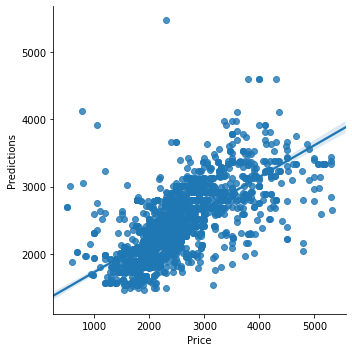

In [141]:
#Stepwise Regression to test valuable X values, ending with overfitted model
sdRents = pd.read_csv('sdRents.csv')

xValue = []
stepWiseRSquared = []
columnList  = ['Sq_Ft', 'Bedrooms', 'Bathrooms', 'EV Charging', 'AC',
       'Cats OK', 'Dogs OK', 'Furnished', 'Smoking', 'Wheelchair', 'apartment',
       'condo', 'cottage/cabin', 'duplex', 'flat', 'house', 'in-law', 'loft',
       'townhouse', 'manufactured', 'assisted living', 'land', 'w/d in unit',
       'w/d hookups', 'laundry in bldg', 'laundry on site',
       'no laundry on site', 'carport', 'attached garage', 'detached garage',
       'off-street parking', 'street parking', 'valet parking', 'no parking',
       'wood_floors', 'carpet_floors', 'concrete_floors', 'tile_floors',
       'earthen_floors', 'other_floors', 'daily_rent', 'weekly_rent',
       'monthly_rent', 'yearly_rent']
i = 0

while i < len(columnList):
#     print(columnList[i], i)
    xS = columnList[i]
    xValue.append(xS)
    X = sdRents[columnList[i]]
    Y = sdRents["Price"]
    X = sm.add_constant(X)
    model = sm.OLS(Y, X).fit()
    predictions = model.predict(X)
    r2 = model.rsquared
    stepWiseRSquared.append(r2)
    i+=1

rSquaredComp = {
    'xValue': xValue,
    'rSquared': stepWiseRSquared
}

stepWiseResults = pd.DataFrame(rSquaredComp)
pd.set_option('display.float_format', lambda x: '%0.4f' % x)
stepWiseResults = stepWiseResults.sort_values('rSquared', ascending=False)
X = stepWiseResults[stepWiseResults["rSquared"] > .010]
## to plug in the stepwise values to the regression analysis
X = X['xValue'].tolist()

##collinearity check
X = sdRents[X]
vif_data = pd.DataFrame()
vif_data["xValue"] = X.columns  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]  
X = vif_data[vif_data["VIF"] < 10]
X = X['xValue'].tolist()
# ## No sq_Ft or Bed or Bath will need to up the vif upper bound

X = vif_data[vif_data["VIF"] < 14]
X = X['xValue'].tolist()

# Testing for Outliers & removing them
z = np.abs(stats.zscore(sdRents['Price']))
##99.7% of data is +/-3
a = list(np.where(z >3))
i = 0
while i < len(a):
    sdRents.drop(a[i], inplace = True)
    i+=1

## log transformation code
sdRents['logPrice'] = np.log10(sdRents['Price'])    

#Adding a 1 for Model 1
X1 = sdRents[X]
Y1 = sdRents["logPrice"]
X1 = sm.add_constant(X1)
model1 = sm.OLS(Y1, X1).fit(cov_type = 'HC1')
predictions = model1.predict(X1)


## checking for autocorrelation
ac = float(durbin_watson(model1.resid))
print("Autocorrelation:", ac)
print("VIF mean", vif_data["VIF"].mean())

## RMSE Measure
data = {
  "Price": sdRents['Price'],#np.exp(Y),
  "Predictions": 10**predictions#np.exp(predictions)
}

df = pd.DataFrame(data)
df['Error'] = ((df['Predictions'])-(df['Price']))
df['Mean Squared Error'] = math.sqrt((df['Error']**2).mean())
df['Abs Value error'] = abs(df['Error'])
df['Error compared to Mean Error'] = df['Mean Squared Error'] - df['Abs Value error']
df['Error compared to Mean Error'].mean()

# ## Testing linearity
sns.lmplot(x = 'Price', y = 'Predictions', data = df)

# ## Testing Normal Errors
# sns.distplot(model.resid, kde=True)

## Testing for heteroscedasticity
# plt.scatter(x=df.index, y=df.Error, alpha=0.5)
names = ['Lagrange multiplier statistic', 'p-value',
         'f-value', 'f p-value']
 
# Get the test result
test_result = dg.het_breuschpagan(model1.resid, model1.model.exog)
 
print(lzip(names, test_result))

## If LM's P-Value were <.05 we could reject the null, and say heteroscedasticity is present

# The null hypothesis (H0): Homoscedasticity is present.
# The alternative hypothesis: (Ha): Homoscedasticity is not present (i.e. heteroscedasticity exists)


print('RMSE is:', df['Mean Squared Error'].mean())
model1.summary()

C:\Users\James\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


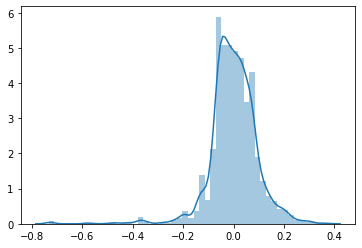

In [5]:
## Testing Normal Errors
sns.distplot(model1.resid, kde=True)

In [6]:
## Testing for Endogeneity Loop needed for X values
Y = X1
Z = Y.drop(['const'], axis=1)

endog = {
    'Residuals': model1.resid
}

## List of my Y values to be tested as endogenous
xVar = list(Z.columns)
print(xVar)
## Dataframe of the X values for testing
A = pd.DataFrame(endog)
print(A)

## list to grab the p values
pValues = []


i=0
while i < len(xVar):
    print("loop:", i)
    X = A
    Y = Z[xVar[i]]
    X = sm.add_constant(X)
    model = sm.OLS(Y, X).fit()
    predictions = model.predict(X)
    print(model.pvalues)
    pValues.append(model.pvalues[1])
    i+=1

endogTest = {
    'IVs': xVar,
    'P Values': pValues
}

eTest = pd.DataFrame(endogTest)
eTest

## H0 - X variable is not endogenous ( if p>0.05 then null hypothesis is true)
## H1 - X variable is endogenous ( if p<0.05 then alternative hypothesis is true)

['w/d in unit', 'Bedrooms', 'laundry on site', 'attached garage', 'Wheelchair', 'laundry in bldg', 'house', 'detached garage', 'EV Charging', 'apartment', 'street parking', 'carport', 'Smoking']
      Residuals
0       -0.1015
1       -0.0385
3        0.1132
4        0.0478
5       -0.0349
...         ...
2246    -0.0180
2247     0.0891
2248    -0.1277
2249    -0.0818
2250    -0.0532

[2209 rows x 1 columns]
loop: 0
const       0.0000
Residuals   1.0000
dtype: float64
loop: 1
const       0.0000
Residuals   1.0000
dtype: float64
loop: 2
const       0.0000
Residuals   1.0000
dtype: float64
loop: 3
const       0.0000
Residuals   1.0000
dtype: float64
loop: 4
const       0.0000
Residuals   1.0000
dtype: float64
loop: 5
const       0.0000
Residuals   1.0000
dtype: float64
loop: 6
const       0.0000
Residuals   1.0000
dtype: float64
loop: 7
const       0.0000
Residuals   1.0000
dtype: float64
loop: 8
const       0.0000
Residuals   1.0000
dtype: float64
loop: 9
const       0.0000
Residuals   

,IVs,P Values
0,w/d in unit,1.0000
1,Bedrooms,1.0000
2,laundry on site,1.0000
3,attached garage,1.0000
4,Wheelchair,1.0000
5,laundry in bldg,1.0000
6,house,1.0000
7,detached garage,1.0000
8,EV Charging,1.0000
9,apartment,1.0000


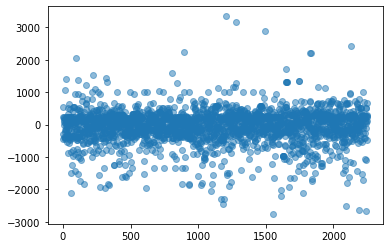

In [7]:
## Testing for heteroscedasticity
plt.scatter(x=df.index, y=df.Error, alpha=0.5)

In [8]:
df

,Price,Predictions,Error,Mean Squared Error,Abs Value error,Error compared to Mean Error
0,2000,2526.6672,526.6672,539.0513,526.6672,12.3841
1,2558,2795.0244,237.0244,539.0513,237.0244,302.0269
3,1900,1464.1934,-435.8066,539.0513,435.8066,103.2447
4,2695,2413.9093,-281.0907,539.0513,281.0907,257.9607
5,2469,2675.8364,206.8364,539.0513,206.8364,332.2149
...,...,...,...,...,...,...
2246,2525,2631.9692,106.9692,539.0513,106.9692,432.0821
2247,2580,2101.6815,-478.3185,539.0513,478.3185,60.7328
2248,1935,2596.5774,661.5774,539.0513,661.5774,-122.5261
2249,1295,1563.3071,268.3071,539.0513,268.3071,270.7442


Autocorrelation: 1.7161225601780357
VIF mean 20.670104564179553
[('Lagrange multiplier statistic', 30.58371373384294), ('p-value', 3.043513774695484e-05), ('f-value', 5.152469255340935), ('f p-value', 2.8571503821054173e-05)]
RMSE is: 566.02112418159


C:\Users\James\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\James\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logPrice   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.422
Method:                 Least Squares   F-statistic:                     222.1
Date:                Thu, 01 Sep 2022   Prob (F-statistic):          4.76e-222
Time:                        23:33:51   Log-Likelihood:                 1985.9
No. Observations:                2209   AIC:                            -3958.
Df Residuals:                    2202   BIC:                            -3918.
Df Model:                           6                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3122      0.011    303.323      0.000       3.291       3.334
Bathrooms      0.0549      0.007      8.184      0.000       0.042       0.068
Bedrooms       0.0359      0.004      8.720      0.000       0.028       0.044
Laundry       -0.0524      0.003    -20.597      0.000      -0.057      -0.047
Wheelchair     0.0227      0.007      3.138      0.002       0.009       0.037
Pets           0.0100      0.002      6.419      0.000       0.007       0.013
Smoking        0.0069      0.005      1.325      0.185      -0.003       0.017
==============================================================================
Omnibus:                      622.993   Durbin-Watson:                   1.716
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5311.947
Skew:                          -1.082   Prob(JB):                         0.00
Kurtosis:                      10.282   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

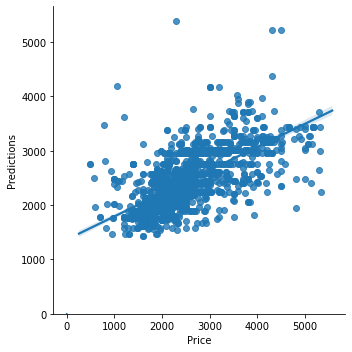

In [142]:
## We've improved model fit and RMSE as much as possible but our model might be overfitted, so lets try to generalize some variables
sdRents = pd.read_csv('sdRents.csv')
xValue = []
stepWiseRSquared = []

## first transformations
conditions = [
    (sdRents['yearly_rent'] == 1),
    (sdRents['monthly_rent'] == 1),
    (sdRents['weekly_rent'] ==1),
    (sdRents['daily_rent'] == 1)]
choices = [4,3,2,1]
sdRents['Rental Cadence'] = np.select(conditions,choices, default=0)

conditions = [
    (sdRents['wood_floors'] == 1),
    (sdRents['carpet_floors'] == 1),
    (sdRents['concrete_floors'] ==1),
    (sdRents['earthen_floors'] == 1)]
choices = [4,3,2,1]
sdRents['Flooring'] = np.select(conditions,choices, default=0)
sdRents.head()

conditions = [
    (sdRents['Dogs OK'] == 1) & (sdRents['Cats OK'] == 1),
    (sdRents['Dogs OK'] == 1) & (sdRents['Cats OK'] == 0),
    (sdRents['Dogs OK'] == 0) & (sdRents['Cats OK'] == 1)]
choices = [3, 2,1]
sdRents['Pets'] = np.select(conditions,choices, default=0)

conditions = [
    (sdRents['carport'] == 1),
    (sdRents['attached garage'] == 1),
    (sdRents['detached garage'] == 1),
    (sdRents['off-street parking'] == 1),
    (sdRents['street parking'] == 1),
    (sdRents['valet parking'] == 1),
    (sdRents['no parking'] == 1)]
choices = [1,2,3,4,5,6,7]
sdRents['Parking'] = np.select(conditions,choices, default=0)

conditions = [
    (sdRents['manufactured'] == 1),
    (sdRents['townhouse'] == 1),
    (sdRents['loft'] == 1),
    (sdRents['in-law'] == 1),
    (sdRents['house'] == 1),
    (sdRents['flat'] == 1),
    (sdRents['duplex'] == 1),
    (sdRents['cottage/cabin'] == 1),
    (sdRents['condo'] == 1),
    (sdRents['apartment'] == 1)]
choices = [1,2,3,4,5,6,7,8,9,10]
sdRents['Housing Type'] = np.select(conditions,choices, default=0)

conditions = [
    (sdRents['w/d in unit'] == 1),
    (sdRents['laundry in bldg'] == 1),
    (sdRents['laundry on site'] == 1),
    (sdRents['no laundry on site'] == 1)]
choices = [1,2,3,4]
sdRents['Laundry'] = np.select(conditions,choices, default=0)

sdRents['logSqFt'] = np.log10(sdRents['Sq_Ft'])    

columnList = ['logSqFt','Bedrooms', 'Bathrooms', 'AC', 'Laundry', 'Parking', 'Pets', 'Housing Type', 'Smoking', 
             'Wheelchair', 'Flooring', 'Rental Cadence']

i = 0

while i < len(columnList):
#     print(columnList[i], i)
    xS = columnList[i]
    xValue.append(xS)
    X = sdRents[columnList[i]]
    Y = sdRents["Price"]
    X = sm.add_constant(X)
    model = sm.OLS(Y, X).fit()
    predictions = model.predict(X)
    r2 = model.rsquared
    stepWiseRSquared.append(r2)
    i+=1

rSquaredComp = {
    'xValue': xValue,
    'rSquared': stepWiseRSquared
}

stepWiseResults = pd.DataFrame(rSquaredComp)
pd.set_option('display.float_format', lambda x: '%0.4f' % x)
stepWiseResults = stepWiseResults.sort_values('rSquared', ascending=False)
X = stepWiseResults[stepWiseResults["rSquared"] > .010]
## to plug in the stepwise values to the regression analysis
X = X['xValue'].tolist()



##collinearity check
X = sdRents[X]
vif_data = pd.DataFrame()
vif_data["xValue"] = X.columns  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

X = vif_data[vif_data["VIF"] < 17]
X = X['xValue'].tolist()
# # ## No sq_Ft or Housing Type

# Testing for Outliers & removing them
z = np.abs(stats.zscore(sdRents['Price']))
##99.7% of data is +/-3
a = list(np.where(z >3))
i = 0
while i < len(a):
    sdRents.drop(a[i], inplace = True)
    i+=1

# ## log transformation code
sdRents['logPrice'] = np.log10(sdRents['Price'])    

X2 = sdRents[X]
Y2 = sdRents["logPrice"]
X2 = sm.add_constant(X2)
model2 = sm.OLS(Y2, X2).fit(cov_type='HC1')
predictions = model2.predict(X2)


## checking for autocorrelation
ac = float(durbin_watson(model2.resid))
print("Autocorrelation:", ac)
print("VIF mean", vif_data["VIF"].mean())

## RMSE Measure
data = {
  "Price": sdRents['Price'],#np.exp(Y),
  "Predictions": 10**predictions#np.exp(predictions)
}

df = pd.DataFrame(data)
df['Error'] = ((df['Predictions'])-(df['Price']))
df['Mean Squared Error'] = math.sqrt((df['Error']**2).mean())
df['Abs Value error'] = abs(df['Error'])
df['Error compared to Mean Error'] = df['Mean Squared Error'] - df['Abs Value error']
df['Error compared to Mean Error'].mean()

# ## Testing linearity
sns.lmplot(x = 'Price', y = 'Predictions', data = df)

# ## Testing Normal Errors
sns.distplot(model2.resid, kde=True)

## Testing for heteroscedasticity
# plt.scatter(x=df.index, y=df.Error, alpha=0.5)
names = ['Lagrange multiplier statistic', 'p-value',
         'f-value', 'f p-value']
 
# Get the test result
test_result = dg.het_breuschpagan(model2.resid, model2.model.exog)
 
print(lzip(names, test_result))

## If LM's P-Value were <.05 we could reject the null, and say heteroscedasticity is present

# The null hypothesis (H0): Homoscedasticity is present.
# The alternative hypothesis: (Ha): Homoscedasticity is not present (i.e. heteroscedasticity exists)


print('RMSE is:', df['Mean Squared Error'].mean())
model2.summary()

C:\Users\James\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


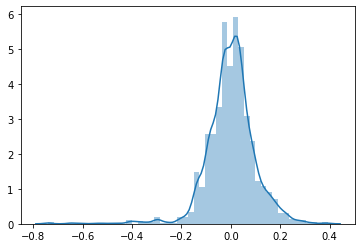

In [10]:
## Breaking out visualizations for:

# ## Testing Normal Errors
sns.distplot(model2.resid, kde=True)

In [11]:
## Testing for Endogeneity Loop needed for X vallues
Y = X2
Z = Y.drop(['const'], axis=1)

endog = {
    'Residuals': model2.resid
}

## List of my Y values to be tested as endogenous
xVar = list(Z.columns)
print(xVar)
## Dataframe of the X values for testing
A = pd.DataFrame(endog)
print(A)

## list to grab the p values
pValues = []


i=0
while i < len(xVar):
    print("loop:", i)
    X = A
    Y = Z[xVar[i]]
    X = sm.add_constant(X)
    model = sm.OLS(Y, X).fit()
    predictions = model.predict(X)
    print(model.pvalues)
    pValues.append(model.pvalues[1])
    i+=1

endogTest = {
    'IVs': xVar,
    'P Values': pValues
}

eTest = pd.DataFrame(endogTest)
eTest

## H0 - X variable is not endogenous ( if p>0.05 then null hypothesis is true)
## H1 - X variable is endogenous ( if p<0.05 then alternative hypothesis is true)

['Bathrooms', 'Bedrooms', 'Laundry', 'Wheelchair', 'Pets', 'Smoking']
      Residuals
0       -0.0795
1       -0.0333
3        0.0689
4        0.0801
5        0.0062
...         ...
2246     0.0149
2247     0.0752
2248    -0.0939
2249    -0.1345
2250    -0.0311

[2209 rows x 1 columns]
loop: 0
const       0.0000
Residuals   1.0000
dtype: float64
loop: 1
const       0.0000
Residuals   1.0000
dtype: float64
loop: 2
const       0.0000
Residuals   1.0000
dtype: float64
loop: 3
const       0.0000
Residuals   1.0000
dtype: float64
loop: 4
const       0.0000
Residuals   1.0000
dtype: float64
loop: 5
const       0.0000
Residuals   1.0000
dtype: float64


,IVs,P Values
0,Bathrooms,1.0000
1,Bedrooms,1.0000
2,Laundry,1.0000
3,Wheelchair,1.0000
4,Pets,1.0000
5,Smoking,1.0000


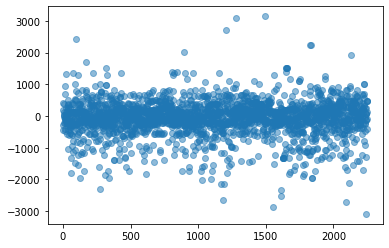

In [12]:
## Testing for heteroscedasticity
plt.scatter(x=df.index, y=df.Error, alpha=0.5)

In [13]:
df

,Price,Predictions,Error,Mean Squared Error,Abs Value error,Error compared to Mean Error
0,2000,2401.8830,401.8830,566.0211,401.8830,164.1381
1,2558,2761.9091,203.9091,566.0211,203.9091,362.1120
3,1900,1621.1342,-278.8658,566.0211,278.8658,287.1553
4,2695,2241.2136,-453.7864,566.0211,453.7864,112.2347
5,2469,2434.1379,-34.8621,566.0211,34.8621,531.1590
...,...,...,...,...,...,...
2246,2525,2440.0969,-84.9031,566.0211,84.9031,481.1181
2247,2580,2169.7366,-410.2634,566.0211,410.2634,155.7577
2248,1935,2401.8830,466.8830,566.0211,466.8830,99.1381
2249,1295,1764.9922,469.9922,566.0211,469.9922,96.0289


In [144]:
## Completing a Test-Training Split with our two identified models
X1_train, X1_test, y1_train, y1_test = train_test_split(
X1, Y1, train_size=0.8, random_state=42)

X2_train, X2_test, y2_train, y2_test = train_test_split(
X2, Y2, train_size=0.8, random_state=42)

## train each model on our training data and use this data to fit
model1_train = sm.OLS(y1_train, X1_train).fit(cov_type='HC1')
model2_train = sm.OLS(y2_train, X2_train).fit(cov_type='HC1')


## use the fit line to predict based off testing data
predictions_test1 = model1_train.predict(X1_test)
predictions_test2 = model2_train.predict(X2_test)

## Create df for calculating model eval criterion
data = {
  "Price": 10**y1_test,
  "Predictions": 10**predictions_test1#np.exp(predictions)
}

df1 = pd.DataFrame(data)
df1['Error'] = ((df1['Predictions'])-(df1['Price']))
df1['Mean Squared Error'] = math.sqrt((df1['Error']**2).mean())
df1['Abs Value error'] = abs(df1['Error'])
df1['Error compared to Mean Error'] = df1['Mean Squared Error'] - df1['Abs Value error']
df1['Error compared to Mean Error'].mean()
print("model1 RMSE:", df1['Mean Squared Error'].mean())
print("Model1 Rsquared:", model1.rsquared)

data = {
  "Price": 10**y2_test,
  "Predictions": 10**predictions_test2#np.exp(predictions)
}

df2 = pd.DataFrame(data)
df2['Error'] = ((df2['Predictions'])-(df2['Price']))
df2['Mean Squared Error'] = math.sqrt((df2['Error']**2).mean())
df2['Abs Value error'] = abs(df2['Error'])
df2['Error compared to Mean Error'] = df2['Mean Squared Error'] - df2['Abs Value error']
df2['Error compared to Mean Error'].mean()
print("model2:", df2['Mean Squared Error'].mean())
print("Model2 Rsquared:", model2.rsquared)


model1 RMSE: 629.597519530761
Model1 Rsquared: 0.46951948183206227
model2: 648.750013439916
Model2 Rsquared: 0.423660410015527


C:\Users\James\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [148]:
print(model1_train.rsquared)
print(model2_train.rsquared)

0.46951948183206227
0.423660410015527
0.4780635993145165
0.4277039161544782


In [ ]:
### NEXT 8/22/2022
# Check sdRents for Nulls (Not founds) make sure test train split didnt include outliers - Done
# 1. Pull out visualizations for each model and clean up so they fire as seperate code cells
# 2. GLS for model 1 and 2 with DV as regular Price - GLS is used with heteroskedastic errors, need to understand use for ols
# 3. Suppprt Vector Regression for each model
# 4. Random Forest Regression for each model

In [17]:
df2

,Price,Predictions,Error,Mean Squared Error,Abs Value error,Error compared to Mean Error
868,3148.0000,3130.6303,-17.3697,648.7500,17.3697,631.3803
1572,2430.0000,2381.1787,-48.8213,648.7500,48.8213,599.9287
1497,3024.0000,2773.6452,-250.3548,648.7500,250.3548,398.3953
439,3795.0000,3212.4699,-582.5301,648.7500,582.5301,66.2199
1585,2348.0000,2229.7886,-118.2114,648.7500,118.2114,530.5386
...,...,...,...,...,...,...
1341,2960.0000,2370.1771,-589.8229,648.7500,589.8229,58.9271
1893,3275.0000,3353.9672,78.9672,648.7500,78.9672,569.7829
1971,1375.0000,1708.4879,333.4879,648.7500,333.4879,315.2621
63,3200.0000,3114.7060,-85.2940,648.7500,85.2940,563.4560


In [143]:
## Using the models to predict specific scenarios need to use these as variable inputs

regr = linear_model.LinearRegression()
regr.fit(X1, Y1)

##predict the Rent from the model at specific levels:
predictedRent = regr.predict([[1, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]])
print("Model1",10**predictedRent)

regr = linear_model.LinearRegression()
regr.fit(X2, Y2)

#predict the Rent from the model at specific levels:
predictedRent = regr.predict([[1, 1, 2, 1, 0, 3, 0]])

print("Model2",10**predictedRent)

Model1 [2568.07712598]
Model2 [2608.63773351]


In [150]:
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

## Convert X and Y values to numpy array then run a generalized regression with test and training split after tuning our 
## parameters for SVR

y1 = np.array(10**Y1, dtype=float)
X1_SVR = X1.drop(['const'], axis=1)
X1_SVR = np.array(X1_SVR, dtype=float)


y2 = np.array(10**Y2, dtype=float)
X2_SVR = X2.drop(['const'], axis=1)
X2_SVR = np.array(X2_SVR, dtype=float)

## Now to test and train SVM Regression Models
X1_train, X1_test, y1_train, y1_test = train_test_split(
X1_SVR, y1, train_size=0.8, random_state=42)

X2_train, X2_test, y2_train, y2_test = train_test_split(
X2_SVR, y2, train_size=0.8, random_state=42)

param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)

C:\Users\James\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [151]:
grid.fit(X1_train, y1_train)
print("params:",grid.best_params_) 
# print how our model looks after hyper-parameter tuning
print("est:",grid.best_estimator_)

C:\Users\James\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.0053798707351018216, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=-0.00897596219021457, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=-0.02724348083818828, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.008691921057492835, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=-0.005938617094202403, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=-0.02306894241764268, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.001446150951271541, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=-0.012249269802527385, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=-0.02964653429416697, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV]  C=0.1, gamma=0.001, kernel=rbf, score=0.0001282846212593558, total=   0.0s
[CV] C=0.1, gamma=0.

[CV]  C=100, gamma=0.0001, kernel=rbf, score=-0.016253364391492164, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.5924889733789254, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.5357876035538192, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.5678392185514669, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV]  C=1000, gamma=0.1, kernel=rbf, score=0.552855073272986, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV]  C=1000, gamma=0.1, kernel=rbf, score=0.5291771196443451, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV]  C=1000, gamma=0.1, kernel=rbf, score=0.528743172751819, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=rbf ..

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:   10.2s finished


params: {'C': 1000, 'gamma': 1, 'kernel': 'rbf'}
est: SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [152]:
grid.fit(X2_train, y2_train)
print("params:",grid.best_params_) 
# print how our model looks after hyper-parameter tuning
print("est:",grid.best_estimator_)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.006605471468231983, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


C:\Users\James\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=rbf, score=-0.007519615503404743, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=-0.02496735865822952, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.011262178697188263, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=-0.0038742477460442797, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=-0.020615104177101218, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.002524678137057701, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=-0.011351956388699458, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=-0.028590006405842194, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV]  C=0.1, gamma=0.001, kernel=rbf, score=0.00025498093300102553, total=   0.0s
[CV] C=0.1, gamm

[CV]  C=100, gamma=0.0001, kernel=rbf, score=-0.004859541356331487, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.5862196503311432, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.49641184776133845, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.5805890614073521, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV]  C=1000, gamma=0.1, kernel=rbf, score=0.52257801334331, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV]  C=1000, gamma=0.1, kernel=rbf, score=0.5024340254736481, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV]  C=1000, gamma=0.1, kernel=rbf, score=0.5461019075487916, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=rbf .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    8.8s finished


In [153]:
regr = make_pipeline(StandardScaler(), SVR(kernel = 'rbf', C=1000, epsilon=0.1))
regr.fit(X1_train, y1_train)
predOne = regr.predict(X1_test)
scoreM1 = regr.score(X1_train, y1_train)
print("Model1",scoreM1)


regr = make_pipeline(StandardScaler(), SVR(kernel = 'rbf', C=1000, epsilon=0.1))
regr.fit(X2_train, y2_train)
predTwo = regr.predict(X2_test)
scoreM2 = regr.score(X2_train, y2_train)
print("Model2",scoreM2)

Model1 0.6592576580509827
Model2 0.5924288815737093


In [154]:
# y1 = 10**y1
data = {
  "Price": y1_test,
  "Predictions": predOne
}

df3 = pd.DataFrame(data)
df3['Error'] = ((df3['Predictions'])-(df3['Price']))
df3['Mean Squared Error'] = math.sqrt((df3['Error']**2).mean())
df3['Abs Value error'] = abs(df3['Error'])
df3['Error compared to Mean Error'] = df3['Mean Squared Error'] - df3['Abs Value error']
df3['Error compared to Mean Error'].mean()
print("Model1 RMSE:", df3['Mean Squared Error'].mean())
print("Model1 Rsquared:", scoreM1)
df3

# y2 = 10**y2
data = {
  "Price": y2_test,
  "Predictions": predTwo
}

df4 = pd.DataFrame(data)
df4['Error'] = ((df4['Predictions'])-(df4['Price']))
df4['Mean Squared Error'] = math.sqrt((df4['Error']**2).mean())
df4['Abs Value error'] = abs(df4['Error'])
df4['Error compared to Mean Error'] = df4['Mean Squared Error'] - df4['Abs Value error']
df4['Error compared to Mean Error'].mean()
print("Model2 RMSE:", df4['Mean Squared Error'].mean())
print("Model2 Rsquared:", scoreM2)
df4

Model1 RMSE: 538.7025845075475
Model1 Rsquared: 0.6592576580509827
Model2 RMSE: 570.2626295337105
Model2 Rsquared: 0.5924288815737093


,Price,Predictions,Error,Mean Squared Error,Abs Value error,Error compared to Mean Error
0,3148.0000,3652.1002,504.1002,570.2626,504.1002,66.1624
1,2430.0000,2430.1005,0.1005,570.2626,0.1005,570.1621
2,3024.0000,2850.0998,-173.9002,570.2626,173.9002,396.3625
3,3795.0000,2213.5407,-1581.4593,570.2626,1581.4593,-1011.1966
4,2348.0000,2495.0999,147.0999,570.2626,147.0999,423.1627
...,...,...,...,...,...,...
437,2960.0000,2479.8993,-480.1007,570.2626,480.1007,90.1619
438,3275.0000,4489.2699,1214.2699,570.2626,1214.2699,-644.0072
439,1375.0000,1986.1414,611.1414,570.2626,611.1414,-40.8788
440,3200.0000,3442.5626,242.5626,570.2626,242.5626,327.7001


In [188]:
# Fitting Random Forest Regression to the dataset
# import the regressor

  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)

X1_train, X1_test, y1_train, y1_test = train_test_split(
X1, y1, train_size=0.8, random_state=42)

# fit the regressor with x and y data
regressor.fit(X1_train, y1_train)
Y_pred = regressor.predict(X1_test)

In [159]:
model1_RF = r2_score(y1_test,Y_pred)

y1_test = y1_test.tolist()
Y_pred = Y_pred.tolist()


data = {
  "Price": y1_test,
  "Predictions":Y_pred
}

df5 = pd.DataFrame(data)
# df5['Price'] = df5['Price'].str[0]
df5['Price'] = df5['Price'].astype('int64')
df5['Error'] = ((df5['Predictions'])-(df5['Price']))
df5['Mean Squared Error'] = math.sqrt((df5['Error']**2).mean())
df5['Abs Value error'] = abs(df5['Error'])
df5['Error compared to Mean Error'] = df5['Mean Squared Error'] - df5['Abs Value error']
df5['Error compared to Mean Error'].mean()
print("Model1 RMSE:", df5['Mean Squared Error'].mean())
print("r^2 is:", r2_score(y1_test,Y_pred))
df5


Model1 RMSE: 541.1573444507683
r^2 is: 0.5539768327393342


,Price,Predictions,Error,Mean Squared Error,Abs Value error,Error compared to Mean Error
0,3147,3314.9385,167.9385,541.1573,167.9385,373.2188
1,2429,2256.4130,-172.5870,541.1573,172.5870,368.5703
2,3023,2684.4463,-338.5537,541.1573,338.5537,202.6036
3,3795,3906.5114,111.5114,541.1573,111.5114,429.6459
4,2348,1697.2266,-650.7734,541.1573,650.7734,-109.6161
...,...,...,...,...,...,...
437,2960,2432.3077,-527.6923,541.1573,527.6923,13.4651
438,3275,4657.1781,1382.1781,541.1573,1382.1781,-841.0208
439,1375,2049.8866,674.8866,541.1573,674.8866,-133.7293
440,3199,4776.1855,1577.1855,541.1573,1577.1855,-1036.0282


In [160]:
X2_train, X2_test, y2_train, y2_test = train_test_split(
X2, y2, train_size=0.8, random_state=42)

regressor.fit(X2_train, y2_train)
Y_pred = regressor.predict(X2_test)

C:\Users\James\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [161]:
model2_RF = r2_score(y2_test,Y_pred)

data = {
  "Price": y2_test,
  "Predictions":Y_pred
}


df6 = pd.DataFrame(data)
df6['Error'] = ((df6['Predictions'])-(df6['Price']))
df6['Mean Squared Error'] = math.sqrt((df6['Error']**2).mean())
df6['Abs Value error'] = abs(df6['Error'])
df6['Error compared to Mean Error'] = df6['Mean Squared Error'] - df6['Abs Value error']
df6['Error compared to Mean Error'].mean()
print("Model2 RMSE:", df6['Mean Squared Error'].mean())
print("r^2 is:", r2_score(y2_test,Y_pred))
df6

Model2 RMSE: 575.2203187547509
r^2 is: 0.4960946004462332


,Price,Predictions,Error,Mean Squared Error,Abs Value error,Error compared to Mean Error
0,3148.0000,3610.2783,462.2783,575.2203,462.2783,112.9421
1,2430.0000,2311.9104,-118.0896,575.2203,118.0896,457.1307
2,3024.0000,2925.2156,-98.7844,575.2203,98.7844,476.4359
3,3795.0000,2910.4452,-884.5548,575.2203,884.5548,-309.3345
4,2348.0000,2384.5930,36.5930,575.2203,36.5930,538.6273
...,...,...,...,...,...,...
437,2960.0000,2544.1963,-415.8037,575.2203,415.8037,159.4166
438,3275.0000,4373.9211,1098.9211,575.2203,1098.9211,-523.7008
439,1375.0000,2324.9975,949.9975,575.2203,949.9975,-374.7772
440,3200.0000,3941.0222,741.0222,575.2203,741.0222,-165.8019


C:\Users\James\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
C:\Users\James\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


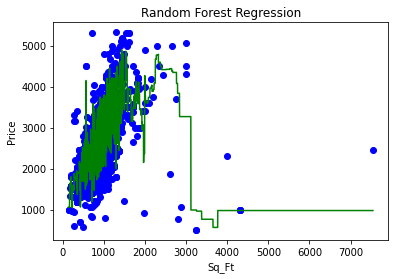

In [192]:
## setting code for a single X Variable RF Regression
X = np.array(sdRents['Sq_Ft'])
Y = np.array(sdRents['Price'])
X = X.reshape(-1, 1)
Y = Y.reshape(-1, 1)

X_train, X_test, Y_train, Y_test = train_test_split(
X, Y, train_size=0.8, random_state=42)
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(X_train, Y_train)
Y_pred = regressor.predict(X_test)

# Visualising the Random Forest Regression results
  
# arrange for creating a range of values
# from min value of x to max 
# value of x with a difference of 0.01 
# between two consecutive values
X_grid = np.arange(min(X), max(X), 0.01) 
  
# reshape for reshaping the data into a len(X_grid)*1 array, 
# i.e. to make a column out of the X_grid value                  
X_grid = X_grid.reshape((len(X_grid), 1))
  
# Scatter plot for original data
plt.scatter(X, Y, color = 'blue')  
  
# plot predicted data
plt.plot(X_grid, regressor.predict(X_grid), 
         color = 'green') 
plt.title('Random Forest Regression')
plt.xlabel('Sq_Ft')
plt.ylabel('Price')
plt.show()

In [193]:
model3_RF = r2_score(Y_test,Y_pred)

Y_test = Y_test.tolist()
Y_pred = Y_pred.tolist()

data = {
  "Price": Y_test,
  "Predictions":Y_pred
}

df7 = pd.DataFrame(data)
df7['Price'] = df7['Price'].str[0]
df7['Price'] = df7['Price'].astype('int64')
df7['Error'] = ((df7['Predictions'])-(df7['Price']))
df7['Mean Squared Error'] = math.sqrt((df7['Error']**2).mean())
df7['Abs Value error'] = abs(df7['Error'])
df7['Error compared to Mean Error'] = df7['Mean Squared Error'] - df7['Abs Value error']
df7['Error compared to Mean Error'].mean()
print("Model1 RMSE:", df7['Mean Squared Error'].mean())
print("r^2 is:", r2_score(Y_test,Y_pred))
df7

Model1 RMSE: 565.8457482952871
r^2 is: 0.5123854128767351


,Price,Predictions,Error,Mean Squared Error,Abs Value error,Error compared to Mean Error
0,3148,3702.5521,554.5521,565.8457,554.5521,11.2936
1,2430,2503.3402,73.3402,565.8457,73.3402,492.5055
2,3024,3131.1000,107.1000,565.8457,107.1000,458.7457
3,3795,3301.8296,-493.1704,565.8457,493.1704,72.6754
4,2348,1939.5952,-408.4048,565.8457,408.4048,157.4409
...,...,...,...,...,...,...
437,2960,2962.4379,2.4379,565.8457,2.4379,563.4079
438,3275,3672.7900,397.7900,565.8457,397.7900,168.0557
439,1375,1794.1911,419.1911,565.8457,419.1911,146.6546
440,3200,3129.2767,-70.7233,565.8457,70.7233,495.1224


In [194]:
modelSpec = ['Specifc', 'General', 'Specific', 'General', 'Specific', 'General', 'Simple']
algorithm = ['OLS', 'OLS', 'SVR', 'SVR', 'RF', 'RF', 'RF']
r2 = [model1_train.rsquared, model2_train.rsquared, scoreM1, scoreM2, model1_RF, model2_RF, model3_RF ]
RMSE = [df1['Mean Squared Error'].mean(), df2['Mean Squared Error'].mean(),
       df3['Mean Squared Error'].mean(), df4['Mean Squared Error'].mean(), df5['Mean Squared Error'].mean(),
       df6['Mean Squared Error'].mean(), df7['Mean Squared Error'].mean()]

data = {'Model Specification': modelSpec,
        'Algorithm': algorithm,
        'RSquared':r2,
        'RMSE': RMSE
       }
finalModelScore = pd.DataFrame(data)
finalModelScore

,Model Specification,Algorithm,RSquared,RMSE
0,Specifc,OLS,0.4781,629.5975
1,General,OLS,0.4277,648.7500
2,Specific,SVR,0.6593,538.7026
3,General,SVR,0.5924,570.2626
4,Specific,RF,0.5540,541.1573
5,General,RF,0.4961,575.2203
6,Simple,RF,0.5124,565.8457
